# Data Analysis and Visualization of Netflix Content

Data analysis and visualization on Netflix content are essential for strategic decision-making, audience understanding, and overall optimization of the streaming platform's content ecosystem. It empowers Netflix to stay competitive, deliver a superior user experience, and navigate the dynamic landscape of the entertainment industry.

Table of Contents:

(a) Importing Libraries

(b) Loading Data

(c) Overview

(d) Data Information & Description

(e) Data Manipulation & Cleaning

(f) Exploratory Data Analysis and Visualization

(g) Conclusions

## Importing Libraries
#Here are some libraries that will be used.

In [22]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import  iplot
import matplotlib.pyplot as plt

## Loading Data
#Loading the data using the pandas library and saving in dataframe 'netflix'.

In [23]:
netflix = pd.read_csv("datasets/Netflix.csv", index_col=0)

## Overview
#First 4 row of the dataset

In [24]:
netflix.head(4)

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...


#Last 4 row of the dataset

In [25]:
netflix.tail(4)

,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
show_id,,,,,,,,,,,
s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...
s999,Movie,Blue Jay,Alex Lehmann,"Sarah Paulson, Mark Duplass, Clu Gulager",United States,6-Dec-16,2016,TV-MA,81,"Dramas, Independent Movies, Romantic Movies",Two former high school sweethearts unexpectedl...


## Data Information & Description

In [26]:
netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [27]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   int64 
 9   genres        7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 730.0+ KB


#Total sum of all null values present in the columns

In [28]:
netflix.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

## Data Manipulation & Cleaning

### Droping missing values(null values)

#Since director column has the maximum number of null value therefore it is better to drop the 
 complete column as no helpful insight will result in output.


In [29]:
netflix.drop(['director'], axis=1, inplace=True)

#'rating' and 'date added' column has few null values so I removed any rows that have missing values in those columns.

In [30]:
netflix.dropna(subset=['rating','date_added'],inplace=True)

### Filling missing values(null values)

#Since the null values in 'cast' and 'country' is neither less nor far to much therefore I replaced the null 
values in the ‘cast’ column with cast unavailable and in the ‘country’ column with country unavailable.

In [31]:
netflix.country.fillna('country unavailable', inplace=True)
netflix.cast.fillna('cast unavailable', inplace=True)

### Converting data type

#Since date type is object so converted date type to date-time type for better analysis

In [32]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='mixed',yearfirst=False,dayfirst=True)

#The data is cleaned and no null value is present in the data, the dataset is now ready for exploration and analysis

In [33]:
netflix.isna().sum() 

type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

## Exploratory Data Analysis and Visualization

#Copying netflix data into sample dataframe for further analysis without harming the original clean data

In [34]:
sample = netflix 
sample.head(2)

,type,title,cast,country,date_added,release_year,rating,duration,genres,description
show_id,,,,,,,,,,
s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s10,Movie,1920,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### The Percentage of Content Types

In [35]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, s1 to s999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          7770 non-null   object        
 1   title         7770 non-null   object        
 2   cast          7770 non-null   object        
 3   country       7770 non-null   object        
 4   date_added    7770 non-null   datetime64[ns]
 5   release_year  7770 non-null   int64         
 6   rating        7770 non-null   object        
 7   duration      7770 non-null   int64         
 8   genres        7770 non-null   object        
 9   description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 667.7+ KB


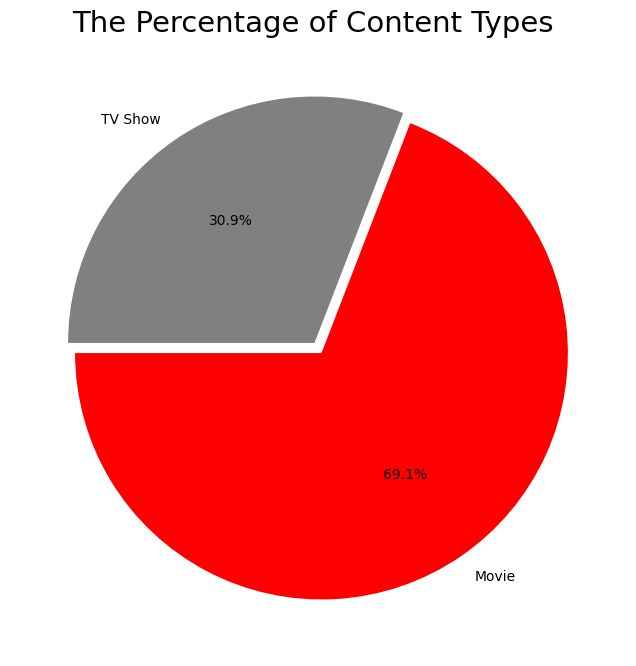

In [36]:
plt.figure(figsize=(12,8))
plt.title("The Percentage of Content Types ", fontsize=21)
plt.pie(sample.type.value_counts(),explode=(0.025,0.025), labels=sample.type.value_counts().index, colors=['red','grey'],  autopct='%1.1f%%', startangle=180)
plt.show()

Observing the presented chart, it is evident that movies constitute 69.1% of the overall content, whereas TV shows make up 30.9% of the total content. This implies that out of a total of 7,787 content titles, there are 5,381 movies and 2,406 TV shows.

### Distribution Map of Producing Countries

In [37]:
Countries = sample[sample['country'] != 'country unavailable']

Countries = Countries['country'].value_counts()
iplot([go.Choropleth(
             locationmode='country names',
             locations=Countries.index,
             z=Countries.values
         )])

Based on the map above, countries producing Netflix content are indicated in a deep shade of blue. It is noteworthy that nearly half of all countries worldwide are contributors to Netflix content production.

### The Number of Content Titles by Rating

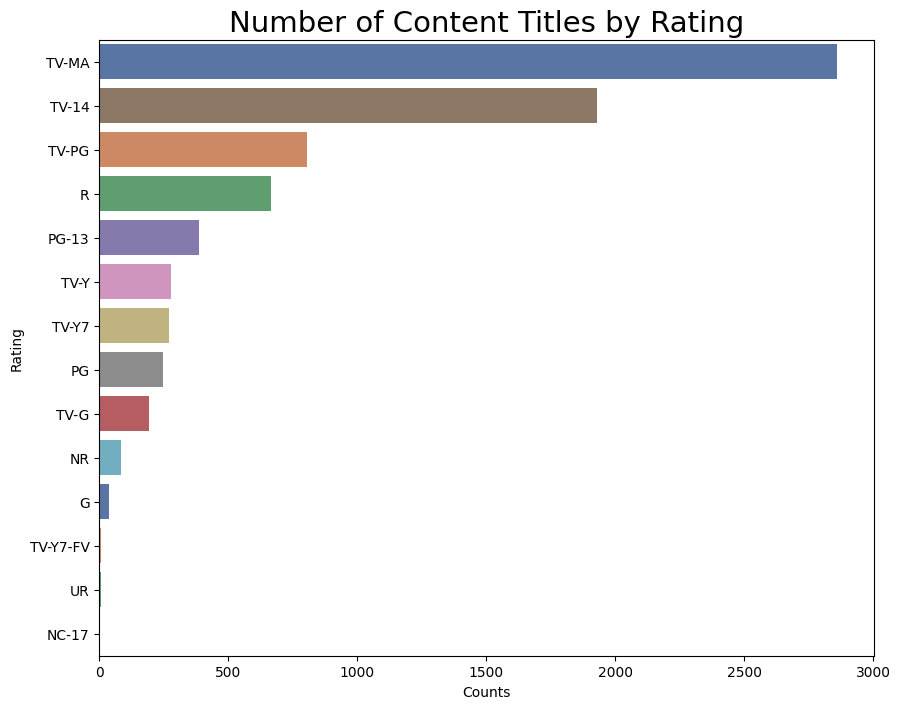

In [38]:
plt.figure(figsize=(10, 8))
sns.countplot(y='rating', data=sample, order=sample.rating.value_counts().index.to_list(), hue='rating', palette='deep',legend=False)
plt.title('Number of Content Titles by Rating', fontsize=21)
plt.ylabel('Rating')
plt.xlabel('Counts')
plt.show()

Examining the provided chart reveals the distribution of content titles across different ratings. The rating with the highest count of content titles is TV-MA, designed for adult audiences and potentially unsuitable for viewers under 17. Conversely, the rating with the lowest number of content titles is NC-17, indicating content not suitable for children under 17.

### Top 10 Years with Largest Number of Releases

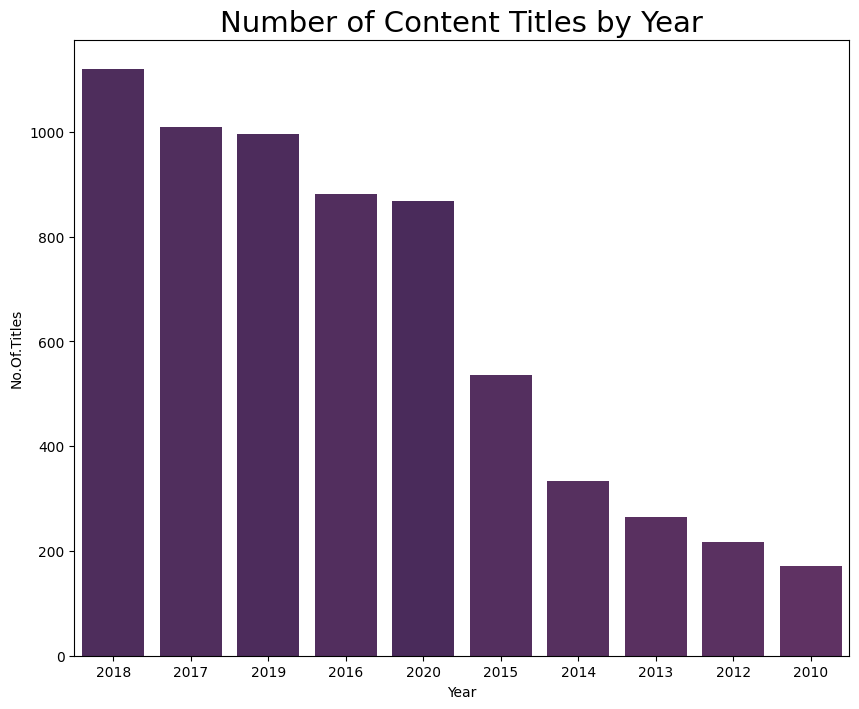

In [39]:
plt.figure(figsize=(10, 8))
sns.countplot(x='release_year', data=sample, order=sample.release_year.value_counts().head(10).index, hue='release_year', palette='flare',legend=False)
plt.title('Number of Content Titles by Year', fontsize=21)
plt.ylabel('No.Of.Titles')
plt.xlabel('Year')
plt.show()

Analyzing the presented graph, it's evident that the count of content titles on Netflix exhibited a consistent upward trend from 2010 to 2020. Nevertheless, in 2020, there was a marginal decrease in the number of content titles compared to the preceding year. This dip may be attributed to the onset of Covid-19 in early 2020.

### Top 10 Actors in the most number of titles

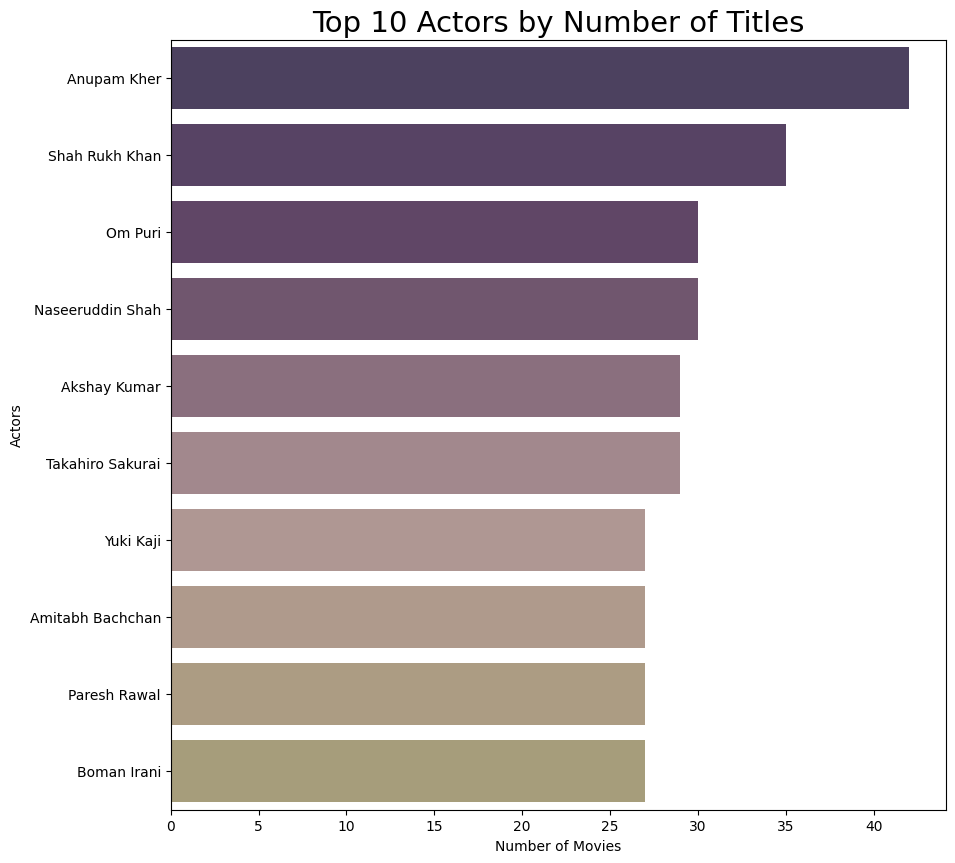

In [40]:
plt.figure(figsize=(10,10))
netflix_cast = sample[sample.cast != 'cast unavailable'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
netflix_cast = netflix_cast.value_counts().head(10)

sns.barplot(x=netflix_cast, y=netflix_cast.index, hue=netflix_cast.index, palette='plasma', saturation=.2, legend=False)
plt.title('Top 10 Actors by Number of Titles', fontsize=21)
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.show()


The image above displays the top 10 actors with the highest count of content titles on Netflix. Notably, Anupam Kher, succeeding Shah Rukh Khan, claims the leading position. Anupam Kher, an Indian actor, boasts a remarkable portfolio with over 40 content titles on Netflix.

### Top 10 Genres with the Largest Number of Content Titles

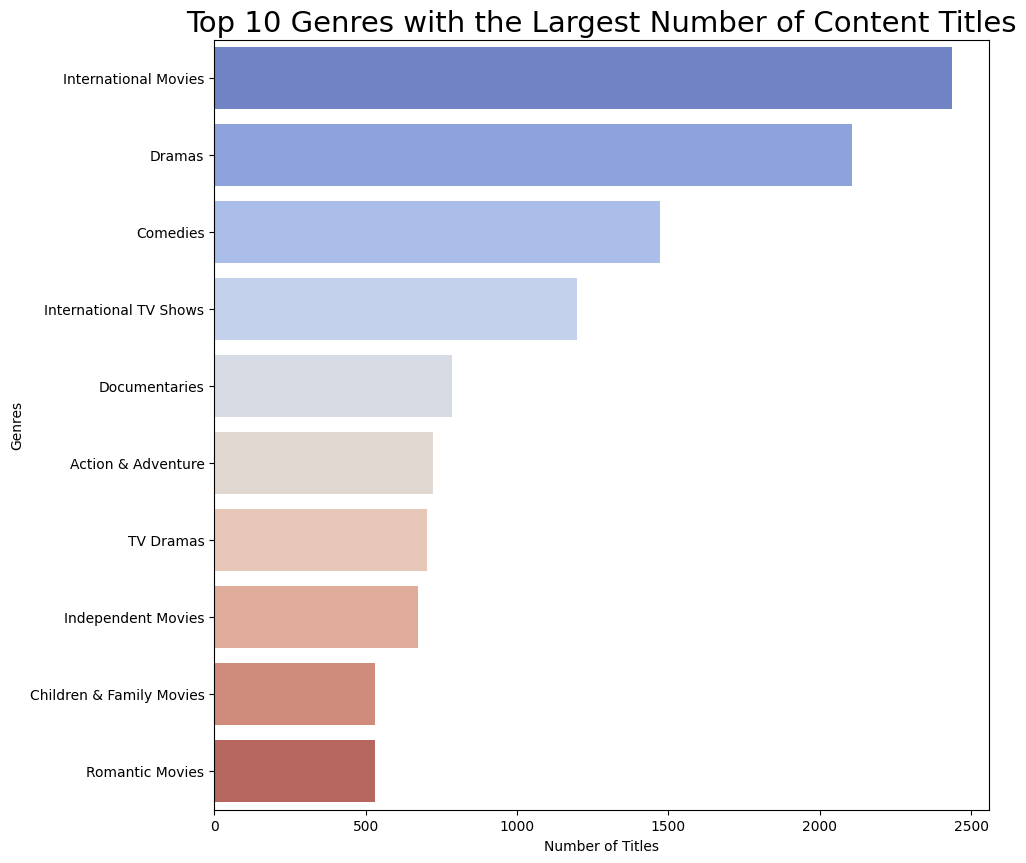

In [41]:
top_genres = sample.set_index('title')['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

genre_counts = top_genres.value_counts().head(10)

plt.figure(figsize=(10, 10))
sns.barplot(x=genre_counts, y=genre_counts.index, hue=genre_counts.index, palette='coolwarm', saturation=.6, legend=False)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21)
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()

Examining the chart provided, it is evident that the top 10 genres with the highest number of content titles are displayed. Notably, the genre claiming the first position is International Movies, boasting a substantial 23,000+ content titles.

### Top 10 Content Producing Countries

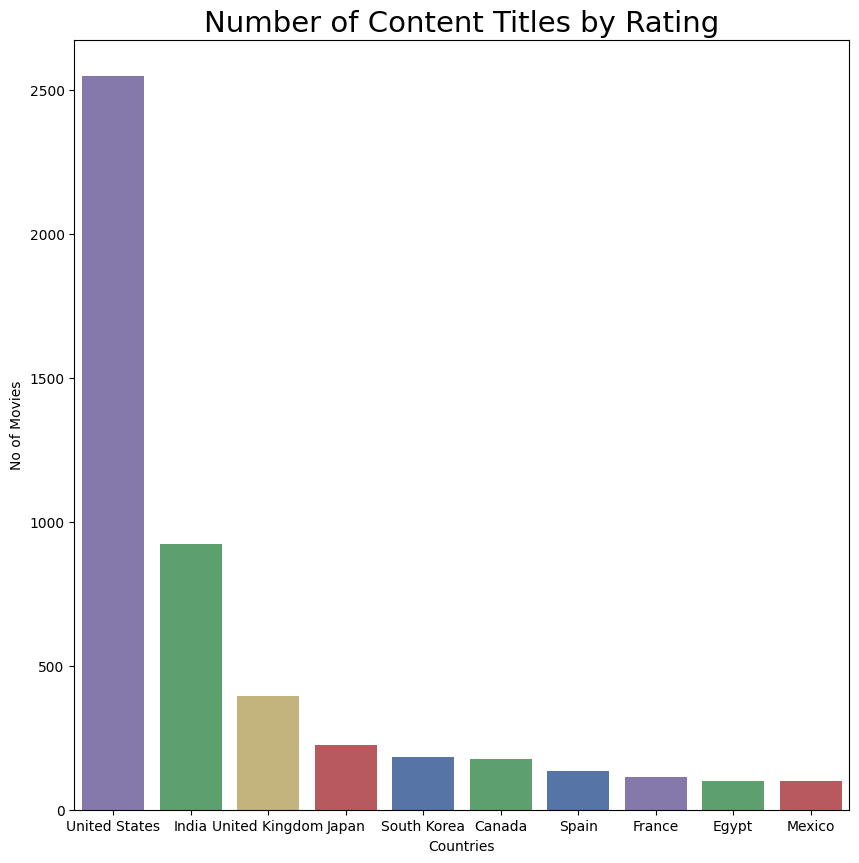

In [42]:
plt.figure(figsize=(10, 10))
sample1 = sample[sample['country']!= 'country unavailable'] 
sns.countplot(x='country', data=sample1, order=sample1.country.value_counts().head(10).index.to_list(), hue='country', palette='deep6',saturation=.8,legend=False)
plt.title('Number of Content Titles by Rating', fontsize=21)
plt.ylabel('No of Movies')
plt.xlabel('Countries')
plt.show()


Based on the information presented in the chart, the top 10 countries contributing the highest number of content titles to Netflix are highlighted. The United States secures the leading position with a noteworthy 2,500+ Netflix content titles. India follows closely as the second-largest content producer on Netflix, contributing approximately 800+ content titles.

### Conclusion



1 Top Contributing Countries: The United States and India emerge as the top contributors to Netflix content, with the United States leading with over 2,500 titles, followed by India with approximately 800 titles. This indicates a significant concentration of content production in these two countries.

2 Content Type Distribution: Movies constitute the majority of Netflix content, comprising 69.1% of the total, while TV shows make up the remaining 30.9%. This distribution suggests a strong emphasis on movies within the platform.

3 Top Genres: The genre with the highest number of content titles is International Movies, boasting over 23,000 titles. This dominance highlights the popularity and diversity of international cinema on Netflix.

4 Global Participation: The map indicates a widespread global participation in Netflix content production, with nearly half of all countries contributing. This underscores the platform's global reach and its ability to source content from various regions.

5 Rating Distribution: The TV-MA rating, designed for adult audiences, has the highest count of content titles, emphasizing a significant portion of mature content on Netflix. Conversely, the NC-17 rating, indicating content not suitable for children under 17, has the lowest count.

6 Content Titles Trend: The graph depicting the count of content titles over the years shows a consistent upward trend from 2010 to 2020. However, there is a marginal decrease in 2020, potentially attributed to the impact of the Covid-19 pandemic, which disrupted various industries, including entertainment.

7 Top Actors: Anupam Kher emerges as the actor with the highest count of content titles on Netflix, surpassing Shah Rukh Khan. This highlights the significance of individual actors in contributing to the platform's content library.

In conclusion, the data provides insights into the geographical distribution, content types, genres, ratings, and trends in Netflix content. These findings can inform strategic decisions for content acquisition, production, and audience targeting on the platform.